<h1><center>DSA 4212: Year 2022</center></h1>
<h3><center> Assignment 2 Question 2  </center></h3>
<h4><center> Group Number: 9 </center></h4>
<h4><center> Group Member 1: Lee Wei Qing, A0205666B </center></h4>
<h4><center> Group Member 2: Madeline Lim Chia Bing, A0205053W </center></h4>
<h4><center> Group Member 3: Mabel Lee Wei Ling, A0204397B </center></h4>
<h4><center> Group Member 4: Wu Wei Ye, A0200578H </center></h4>

# ----------------

In [ ]:
%matplotlib inline
from jax.config import config
config.update("jax_enable_x64", True) # for higher accuracy

import jax
import jax.numpy as np
import numpy as onp
import pylab as plt
import os
import pandas as pd
import time

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#load attributes csv file
path = "/content/drive/MyDrive/DSA4212_Project/Assignment2/Dataset/"

In [ ]:
movies_data = pd.read_csv(os.path.join(path, "movies.dat"), encoding='latin-1', sep='::' , header=None, engine='python')
ratings_data = pd.read_csv(os.path.join(path, "ratings.dat"), sep='::', header=None, engine='python')
users_data = pd.read_csv(os.path.join(path, "users.dat"), sep='::', header=None, engine='python')

# Data Cleaning

## Movies 

In [ ]:
# cleaning up movie dataset
movies_data1 = []
for i in range(len(movies_data)):
  movie_id = [movies_data.iloc[i,0]]
  movies_data1 = movies_data1 + [ movie_id + [y] + [i]  for y in movies_data.iloc[i,2].split('|')]

movies_df = pd.DataFrame(movies_data1, columns = ['Movie_ID', 'genre', 'id'])
movies_df

,Movie_ID,genre,id
0,1,Animation,0
1,1,Children's,0
2,1,Comedy,0
3,2,Adventure,1
4,2,Children's,1
...,...,...,...
6403,3949,Drama,3879
6404,3950,Drama,3880
6405,3951,Drama,3881
6406,3952,Drama,3882


In [ ]:
# pivot wider the genres
genre_dummies = pd.get_dummies(movies_df.genre)
movies_df1 = pd.concat((movies_df[['Movie_ID', 'id']], genre_dummies), axis = 1)

# movies dataset
movies_df1 = movies_df1.groupby(['Movie_ID', 'id']).sum().reset_index()
movies_df1 

,Movie_ID,id,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,3878,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3879,3949,3879,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3880,3950,3880,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3881,3951,3881,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


## Ratings

In [ ]:
# ratings dataset
ratings_data.columns = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp']
ratings_df = ratings_data[['User_ID', 'Movie_ID', 'Rating']]
ratings_df

,User_ID,Movie_ID,Rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5
...,...,...,...
1000204,6040,1091,1
1000205,6040,1094,5
1000206,6040,562,5
1000207,6040,1096,4


In [ ]:
ratings_df = pd.merge(ratings_df, movies_df, on = 'Movie_ID')
ratings_df

,User_ID,Movie_ID,Rating,genre,id
0,1,1193,5,Drama,1176
1,2,1193,5,Drama,1176
2,12,1193,4,Drama,1176
3,15,1193,4,Drama,1176
4,17,1193,5,Drama,1176
...,...,...,...,...,...
2101810,5780,2845,1,Drama,2776
2101811,5851,3607,5,Comedy,3538
2101812,5851,3607,5,Drama,3538
2101813,5851,3607,5,Western,3538


## Users

In [ ]:
# user dataset
users_data.columns = ['User_ID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users_df = users_data[['User_ID', 'Gender', 'Age', 'Occupation']]
users_df

,User_ID,Gender,Age,Occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20
...,...,...,...,...
6035,6036,F,25,15
6036,6037,F,45,1
6037,6038,F,56,1
6038,6039,F,45,0


In [ ]:
ratings_df = ratings_df.drop_duplicates(subset = ['User_ID', 'id'], keep='last')
train_df1 = ratings_df.groupby('User_ID', group_keys=False).apply(lambda x: x.sample(frac=0.9, random_state=2603))
train_df2 = train_df1.groupby('User_ID', group_keys=False).apply(lambda x: x.sample(frac=0.9, random_state=2603))
val_df2 = ratings_df[~ratings_df.index.isin(train_df2.index)].reset_index(drop=True)
train_df2 = train_df2.reset_index(drop=True)

In [ ]:
cols1 = onp.sort(ratings_df['Movie_ID'].unique())
y_train_cv = train_df2.pivot(index='User_ID', columns='Movie_ID', values='Rating').reindex(columns = cols1)
y_train_cv = y_train_cv.reset_index()
y_val_cv = val_df2.pivot(index='User_ID', columns='Movie_ID', values='Rating').reindex(columns = cols1)
y_val_cv = y_val_cv.reset_index()

In [ ]:
# filling into the train y matrix the missing movie ratings
movie_id = list(movies_df1['Movie_ID'].unique())
movie_id1 = list(y_train_cv.columns[1:])
missing = list(set(movie_id).difference(movie_id1))

for i in missing:
  y_train_cv[i] = [0]*6040
y_train_cv = y_train_cv[['User_ID'] + movie_id]


# filling into the test y matrix the missing movie ratings
movie_id2= list(y_val_cv.columns[1:])
missing = list(set(movie_id).difference(movie_id2))

for i in missing:
  y_val_cv[i] = [0]*6040
y_val_cv = y_val_cv[['User_ID'] + movie_id]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()


In [ ]:
y_train_cv1 = y_train_cv.drop(columns = ['User_ID'])
y_train_cv1 = np.array(y_train_cv1)
y_train_cv1 = onp.nan_to_num(y_train_cv1)


In [ ]:
y_val_cv1 = y_val_cv.drop(columns = ['User_ID'])
y_val_cv1 = np.array(y_val_cv1)
y_val_cv1 = onp.nan_to_num(y_val_cv1)
y_val_cv1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
u_list_train2 = onp.array(train_df2['User_ID'] - 1)
f_list_train2 = onp.array(train_df2['id'])
u_list_test2 = np.array(val_df2['User_ID'] - 1)
f_list_test2 = np.array(val_df2['id'])
y_train_cv_final = train_df2['Rating']
y_val_cv_final = val_df2['Rating']

In [ ]:
onp.shape(y_val_cv1)

(6040, 3883)

# Model

# ALS-WR 

In [ ]:
# Check for empty columns and rows to drop in y_train

a = onp.sum(y_train_cv1!=0,axis = 0) #sum of non-zeros across columns
drop_c = [i for i in range(len(a)) if a[i] == 0 ] #indexes of columns with only 0

b = onp.sum(y_train_cv1!=0,axis = 1) #sum of non-zeros across rows
drop_r = [i for i in range(len(b)) if b[i] == 0 ]

# drop columns and rows for both train and test
y_train2 = onp.copy(y_train_cv1)
y_train2 = onp.delete(y_train2, drop_c, axis = 1)
y_train2 = onp.delete(y_train2, drop_r, axis = 0)

y_test2 = onp.copy(y_val_cv1)
y_test2 = onp.delete(y_test2, drop_c, axis = 1)
y_test2 = onp.delete(y_test2, drop_r, axis = 0)
onp.shape(y_test2)


(6040, 3683)

In [ ]:
# Indexes of non-zero_entry; to be used to calculate MSE
train_indexes = onp.nonzero(y_train2)
test_indexes = onp.nonzero(y_test2)

In [ ]:
# X = UV (mxn)
# U = users (kxm)
# V = movies (kxn)

def MSE(U,V,Y,indexes):
    predictions = (U @ V)[indexes]
    errors = Y[indexes] - predictions
    return np.mean(errors**2)

def update_U(U,V,lam,X):
  k,m = onp.shape(U)
  U_n = onp.zeros(shape = (k,m))

  for i in range(0,m):

    #Ii is the set of movies j user i has rated
    c = onp.nonzero(X[i,:])  # column indexes of the movies user i has rated
    Ii = onp.unique(c)
    n_ui = onp.size(Ii)   

    # M_i is the submatrix of V where columns j are selected if user has rated that movie
    M_i = V[:,list(Ii)]

    # R_i is the row vector where columns j of the ith row of X(ratings matrix)
    R_i = X[i,list(Ii)]

    A_i = M_i @ onp.transpose(M_i) + lam*n_ui*onp.eye(k)
    V_i = M_i @ onp.transpose(R_i)

    U_n[:,i] = onp.linalg.inv(A_i) @ V_i

  return U_n

def update_V(U,V,lam,X):
  k,n = onp.shape(V)
  V_n = onp.zeros(shape = (k,n))

  for j in range(0,n):

    #Ij is the set of users i that rated movie j
    c = onp.nonzero(X[:,j])  # row indexes of the users that rated movie j
    Ij = onp.unique(c)
    n_mj = onp.size(Ij)

    # U_j is the submatrix of U where columns i are selected if movie has been rated
    U_j = U[:,list(Ij)]

    # R_i is the column vector where rows i of the jth column X(ratings matrix)
    R_j = X[list(Ij),j]

    A_j = U_j @ onp.transpose(U_j) + lam*n_mj*onp.eye(k)
    V_j = U_j @ R_j

    V_n[:,j] = onp.linalg.inv(A_j) @ V_j
    
  return V_n

In [ ]:
train_err = onp.zeros(shape = (10 , 20))
val_err = onp.zeros(shape = (10, 20))

start_time  = time.time()

for n in range(1,11,1):
  lam = n
  for m in range(1, 100, 5):
    d = (m//5) 

    # Initialise U and V
    r = m #choose from 10-1000
    onp.random.seed(2603)

    # For movies matrix, let first row by average of ratings
    V_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(r * 3683)).reshape(r, 3683)
    V_init[0,:] = onp.sum(y_train2, axis = 0)/onp.count_nonzero(y_train2, axis =0)

    U_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(6040 * r)).reshape(r,6040)

    niter = 20

    U = onp.copy(U_init)
    V  = onp.copy(V_init)
    X = onp.copy(y_train2)


    for i in range(niter):

      # Fix V, find U
      U = update_U(U,V,lam,X)

      # Fix U, find V
      V = update_V(U,V,lam,X)

    # check the loss at the end of each training
    err_train = MSE(onp.transpose(U), V, X, train_indexes)
    train_err[n-1, d] = err_train

    err_val= MSE(onp.transpose(U), V, onp.copy(y_test2), test_indexes)
    val_err[n-1, d] = err_val

    print(f"lambda:{n} \t  rank:{m} \t RMSE(train):{err_train:2.4f} \t RMSE(val):{err_val:2.4f}")
print("Took", time.time() - start_time, "s to run.")



lambda:1 	  rank:1 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:6 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:11 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:16 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:21 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:26 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:31 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:36 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:41 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:46 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:51 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:56 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:61 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:66 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:71 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:76 	 RMSE(train):1.8182 	 RMSE(val):1.8364
lambda:1 	  rank:81 	 RMSE(train):1.8182 	

Text(0.5, 0, 'Lambda')

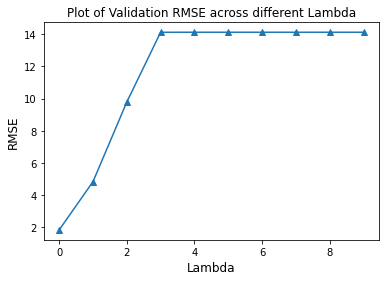

In [ ]:
plt.plot(val_err[:,0], "-^")
plt.title("Plot of Validation RMSE across different Lambda")
plt.ylabel("RMSE", fontsize = 12)
plt.xlabel("Lambda", fontsize = 12)


## ALS


In [ ]:
def MSE(U,V,Y,u_list_train,f_list_train):
    predictions = (U @ V)[u_list_train.astype(int), f_list_train.astype(int)]
    errors = Y - predictions
    return np.mean(errors**2)

def RMSE(U,V,Y,u_list_train,f_list_train):
    predictions = (U @ V)[u_list_train.astype(int), f_list_train.astype(int)]
    errors = Y - predictions
    return (np.mean(errors**2))**(1/2)

# ALS

In [ ]:
# X = UV (mxn)
# U = users (kxm)
# V = movies (kxn)

train_err = onp.zeros(shape = (10 , 20))
val_err = onp.zeros(shape = (10, 20))

start_time  = time.time()
for n in range(1,11,1):
  lam = n
  for m in range(1, 100, 5):
    d = (m//5) 
    r = m #choose from 1-100
    onp.random.seed(2603)
    # Initialise U and V
    U_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(6040 * r)).reshape(6040,r)
    V_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(r * 3883)).reshape(r, 3883)
    X = onp.copy(y_train_cv1)
    test = onp.copy(y_val_cv1)

    niter = 20
    U = onp.copy(U_init)
    V  = onp.copy(V_init)

    for i in range(niter):

      # Fix U, find V
      V = (onp.linalg.inv( onp.transpose(U) @ U   + lam * onp.eye(r)) @ onp.transpose(U)) @ X

      # Fix V, find U
      U = (onp.linalg.inv( V @ onp.transpose(V) + lam * onp.eye(r)) @ V @ onp.transpose(X)).T

    # check the loss at the end of each training
    err_train = RMSE(U, V, onp.copy(y_train_cv_final), u_list_train2, f_list_train2)
    train_err[n-1, d] = err_train

    err_val= RMSE(U, V, onp.copy(y_val_cv_final), u_list_test2, f_list_test2)
    val_err[n-1, d] = err_val

    print(f"lambda:{n} \t  rank:{m} \t RMSE(train):{err_train:2.4f} \t RMSE(val):{err_val:2.4f}")
print("Took", time.time() - start_time, "s to run.")

lambda:1 	  rank:1 	 RMSE(train):3.0802 	 RMSE(val):3.0841
lambda:1 	  rank:6 	 RMSE(train):2.8220 	 RMSE(val):2.8545
lambda:1 	  rank:11 	 RMSE(train):2.7143 	 RMSE(val):2.7682
lambda:1 	  rank:16 	 RMSE(train):2.6512 	 RMSE(val):2.7309
lambda:1 	  rank:21 	 RMSE(train):2.6040 	 RMSE(val):2.7109
lambda:1 	  rank:26 	 RMSE(train):2.5662 	 RMSE(val):2.7021
lambda:1 	  rank:31 	 RMSE(train):2.5347 	 RMSE(val):2.7039
lambda:1 	  rank:36 	 RMSE(train):2.5068 	 RMSE(val):2.7089
lambda:1 	  rank:41 	 RMSE(train):2.4812 	 RMSE(val):2.7180
lambda:1 	  rank:46 	 RMSE(train):2.4569 	 RMSE(val):2.7295
lambda:1 	  rank:51 	 RMSE(train):2.4346 	 RMSE(val):2.7418
lambda:1 	  rank:56 	 RMSE(train):2.4133 	 RMSE(val):2.7549
lambda:1 	  rank:61 	 RMSE(train):2.3933 	 RMSE(val):2.7715
lambda:1 	  rank:66 	 RMSE(train):2.3745 	 RMSE(val):2.7880
lambda:1 	  rank:71 	 RMSE(train):2.3550 	 RMSE(val):2.8022
lambda:1 	  rank:76 	 RMSE(train):2.3368 	 RMSE(val):2.8191
lambda:1 	  rank:81 	 RMSE(train):2.3184 	

In [ ]:
min_value = onp.amin(val_err)
min_index = onp.where(val_err == min_value)
min_index   #lam = 1, r = 26

(array([0]), array([5]))

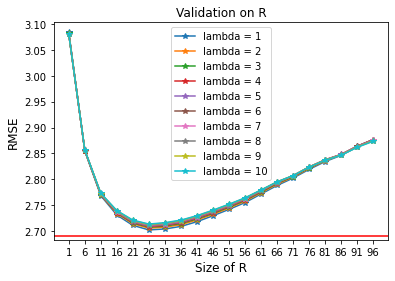

In [ ]:
iter = list(range(1, 100, 5))
for j in range(1,11):
  plt.plot(iter, val_err[j-1,:], "-*", label = "lambda = {}".format(j))
plt.title("Validation on R")
plt.ylabel("RMSE", fontsize = 12)
plt.xlabel("Size of R", fontsize = 12)
plt.xticks(iter)  
plt.axhline(y=2.69, color='r', linestyle='-')
plt.legend()


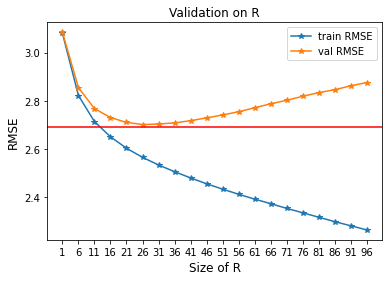

In [ ]:
iter = list(range(1, 100, 5))
plt.plot(iter, train_err, "-*", label = 'train RMSE')
plt.plot(iter, val_err, "-*", label = 'val RMSE')
plt.title("Validation on R")
plt.ylabel("RMSE", fontsize = 12)
plt.xlabel("Size of R", fontsize = 12)
plt.xticks(iter)  
plt.axhline(y=2.69, color='r', linestyle='-')
plt.legend()


# ALS with best R = 26, lam = 1

In [ ]:
ratings_df = ratings_df.drop_duplicates(subset = ['User_ID', 'id'], keep='last')
train_df = ratings_df.groupby('User_ID', group_keys=False).apply(lambda x: x.sample(frac=0.9, random_state=2603))
test_df = ratings_df[~ratings_df.index.isin(train_df.index)].reset_index(drop=True)
train_df = train_df.reset_index(drop=True)

In [ ]:
cols = onp.sort(ratings_df['Movie_ID'].unique())
y_train = train_df.pivot(index='User_ID', columns='Movie_ID', values='Rating').reindex(columns = cols)
y_train = y_train.reset_index()
y_test = test_df.pivot(index='User_ID', columns='Movie_ID', values='Rating').reindex(columns = cols)
y_test = y_test.reset_index()

In [ ]:
# filling into the train y matrix the missing movie ratings
movie_id = list(movies_df1['Movie_ID'].unique())
movie_id1 = list(y_train.columns[1:])
missing = list(set(movie_id).difference(movie_id1))

for i in missing:
  y_train[i] = [0]*6040
y_train = y_train[['User_ID'] + movie_id]


# filling into the test y matrix the missing movie ratings
movie_id2= list(y_test.columns[1:])
missing = list(set(movie_id).difference(movie_id2))

for i in missing:
  y_test[i] = [0]*6040
y_test = y_test[['User_ID'] + movie_id]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  app.launch_new_instance()


In [ ]:
y_train1 = y_train.drop(columns = ['User_ID'])
y_train1 = np.array(y_train1)
y_train1 = onp.nan_to_num(y_train1)
y_train1

array([[5., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [3., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y_test1 = y_test.drop(columns = ['User_ID'])
y_test1 = np.array(y_test1)
y_test1 = onp.nan_to_num(y_test1)
y_test1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
u_list_train = onp.array(train_df['User_ID'] - 1)
f_list_train = onp.array(train_df['id'])
u_list_test = np.array(test_df['User_ID'] - 1)
f_list_test = np.array(test_df['id'])
y_train_final = train_df['Rating']
y_test_final = test_df['Rating']

In [ ]:
# X = UV (mxn)
# U = users (kxm)
# V = movies (kxn)


# Initialise U and V
r = 26
lam = 1
onp.random.seed(2603)

U_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(6040 * r)).reshape(6040,r)
V_init = onp.random.normal(0, scale=1/np.sqrt(r), size=(r * 3883)).reshape(r, 3883)
X = onp.copy(y_train1)
test = onp.copy(y_test1)

start_time  = time.time()

niter = 20
U = onp.copy(U_init)
V  = onp.copy(V_init)


MSE_train = []
MSE_test = []

for i in range(niter):

  # Fix U, find V
  V = (onp.linalg.inv( onp.transpose(U) @ U   + lam * onp.eye(r)) @ onp.transpose(U)) @ (X)

  # Fix V, find U
  U = (onp.linalg.inv( V @ onp.transpose(V) + lam * onp.eye(r)) @ V @ onp.transpose(X)).T


  # check the loss for monitoring purposes
  err_train = RMSE(U, V, onp.copy(y_train_final), u_list_train, f_list_train)
  MSE_train.append(err_train)

  err_val= RMSE(U, V, onp.copy(y_test_final), u_list_test, f_list_test)
  MSE_test.append(err_val)

  print(f"iter:{i} \t Loss:{err_train} \t RMSE(train):{err_train:2.4f} \t RMSE(val):{err_val:2.4f}")
print("Took", time.time() - start_time, "s to run.")

iter:0 	 Loss:2.8977634348306505 	 RMSE(train):2.8978 	 RMSE(val):2.9988
iter:1 	 Loss:2.5463279565764827 	 RMSE(train):2.5463 	 RMSE(val):2.6831
iter:2 	 Loss:2.5067595464696426 	 RMSE(train):2.5068 	 RMSE(val):2.6440
iter:3 	 Loss:2.4942208391646874 	 RMSE(train):2.4942 	 RMSE(val):2.6298
iter:4 	 Loss:2.4881475354275695 	 RMSE(train):2.4881 	 RMSE(val):2.6227
iter:5 	 Loss:2.4845072538989967 	 RMSE(train):2.4845 	 RMSE(val):2.6186
iter:6 	 Loss:2.4820543603832093 	 RMSE(train):2.4821 	 RMSE(val):2.6160
iter:7 	 Loss:2.4802615017846183 	 RMSE(train):2.4803 	 RMSE(val):2.6143
iter:8 	 Loss:2.4788739473062957 	 RMSE(train):2.4789 	 RMSE(val):2.6130
iter:9 	 Loss:2.477758969399406 	 RMSE(train):2.4778 	 RMSE(val):2.6120
iter:10 	 Loss:2.4768385778757036 	 RMSE(train):2.4768 	 RMSE(val):2.6112
iter:11 	 Loss:2.476061125200013 	 RMSE(train):2.4761 	 RMSE(val):2.6105
iter:12 	 Loss:2.4753904643773597 	 RMSE(train):2.4754 	 RMSE(val):2.6099
iter:13 	 Loss:2.47480108447915 	 RMSE(train):2.47

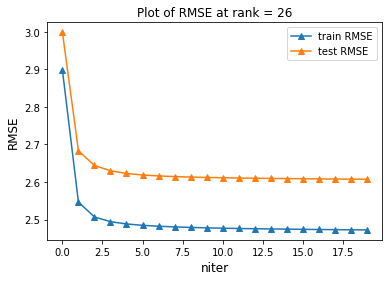

In [ ]:
plt.plot(MSE_train, "-^", label = 'train RMSE')
plt.plot(MSE_test, "-^", label = 'test RMSE')
plt.title("Plot of RMSE at rank = 26")
plt.ylabel("RMSE", fontsize = 12)
plt.xlabel("niter", fontsize = 12)
plt.legend()

In [ ]:
# train RMSE
RMSE(U, V, onp.copy(y_train_final), u_list_train, f_list_train)

DeviceArray(2.47225305, dtype=float64)

In [ ]:
# test RMSE
RMSE(U, V, onp.copy(y_test_final), u_list_test, f_list_test)

DeviceArray(2.60719712, dtype=float64)

# ----------------